In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
train_data = pd.read_csv("./data/completed_train_data.csv", sep=";")

In [42]:
def RMSE_hfactory(y_test, y_pred):
    R_0 = mean_squared_error(y_test, [0 for i in range(len(y_test))], squared=False)
    RMSE_pred = mean_squared_error(y_test, y_pred, squared=False)
    return (R_0 - 0.8 * RMSE_pred)/R_0, R_0

In [4]:
X = train_data.drop(columns="target")
y = train_data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=424269)

In [10]:
categorical_features    = [
                            #"Region",
                            "Country",
                            "Site",
                            #"Operations",
                            #"Zone",
                            #"Cluster",
                            #"Reference proxy",
                            #"Product  Line proxy", #typo !
                            "Division proxy",
                            "Customer Persona proxy",
                            "Strategic Product Family proxy",
                            "Product Life cycel status", #typo !
                            "Date"
                        ]

numerical_features      = [
                            'Month 1', 'Month 2', 'Month 3',
    'Month 5', 'Month 6', 'Month 7', 'Month 9', 'Month 10', 'Month 11',
    'Month 13', 'Month 14', 'Month 15', 'Month 17', 'Month 18', 'Month 19',
    'Month 21', 'Month 22', 'Month 23', 'Month 25', 'Month 26', 'Month 27',
    'Month 29', 'Month 30', 'Month 31', #'Month 33',
    'Month 34', 'Month 35', 'GSCPI'
                        ]

# Pipeline de transformation des features catégoriques

In [14]:

from sklearn.neural_network import MLPRegressor

categorical_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(encoded_missing_value=3))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
])


reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(hidden_layer_sizes=(100,100), random_state=1, max_iter=200, n_iter_no_change=20, early_stopping=True, verbose=True))
    #('regressor', HistGradientBoostingRegressor(max_iter=400, tol=1e-10, random_state=42427, verbose=True))
])

reg.fit(X_train, y_train)

Iteration 1, loss = 159919.85709547
Validation score: 0.520216
Iteration 2, loss = 141264.40635112
Validation score: 0.541803
Iteration 3, loss = 138126.74041167
Validation score: 0.559201
Iteration 4, loss = 140260.58277848
Validation score: 0.524515
Iteration 5, loss = 139316.56595374
Validation score: 0.510526
Iteration 6, loss = 137696.57931841
Validation score: 0.554505
Iteration 7, loss = 136136.67652988
Validation score: 0.550358
Iteration 8, loss = 129433.17426159
Validation score: 0.464820
Iteration 9, loss = 139038.81081877
Validation score: 0.551518
Iteration 10, loss = 134560.38061395
Validation score: 0.559372
Iteration 11, loss = 131734.70209667
Validation score: 0.572296
Iteration 12, loss = 135183.35528985
Validation score: 0.566185
Iteration 13, loss = 131736.87769654
Validation score: 0.474788
Iteration 14, loss = 133378.70118485
Validation score: 0.533928
Iteration 15, loss = 132325.18903846
Validation score: 0.549850
Iteration 16, loss = 132005.77814841
Validation s

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(encoded_missing_value=3))]),
                                                  ['Country', 'Site',
                                                   'Division proxy',
                                                   'Customer Persona proxy',
                                                   'Strategic Product Family '
                                                   'proxy',
                                                   'Product Life cycel status',
                                                   'Date']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   S...
                                                   'Month 6', 'Month 7',
                                                   'Month 9', 'Month 10',
                                                   'Month 11', 'Month 13',
                                                   'Month 14', 'Month 15',
                                                   'Month 17', 'Month 18',
                                                   'Month 19', 'Month 21',
                                                   'Month 22', 'Month 23',
                                                   'Month 25', 'Month 26',
                                                   'Month 27', 'Month 29',
                                                   'Month 30', 'Month 31',
                                                   'Month 34', 'Month 35',
                                                   'GSCPI'])])),
                ('regressor',
                 MLPRegressor(early_stopping=True,
                              hidden_layer_sizes=(100, 100),
                              n_iter_no_change=20, random_state=1,
                              verbose=True))])

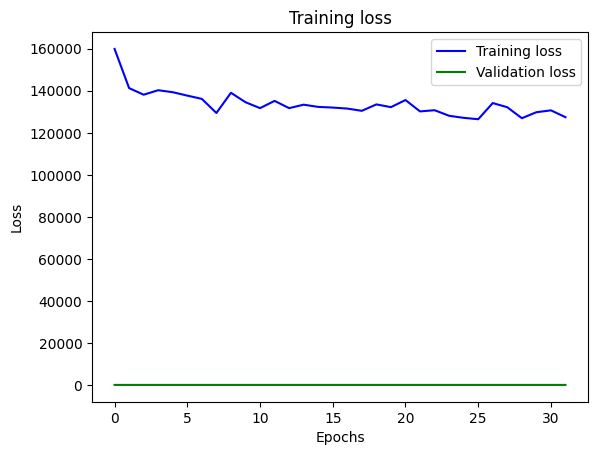

In [15]:
plt.plot(reg["regressor"].loss_curve_,'b', label='Training loss')
plt.plot(reg["regressor"].validation_scores_, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [43]:
y_pred = reg.predict(X_test)
y_pred2 = np.vectorize(lambda i : 0 if i < 0 else i//1)(y_pred)
mean_squared_error(y_test, y_pred2, squared=False), RMSE_hfactory(y_test, y_pred)

(436.91903153733807, (0.4787834258821013, 670.6590699166927))

In [23]:
df_test = pd.read_csv("./data/X_test.csv", sep=";")
train_data_run = pd.read_csv("./data/completed_train_data.csv", sep=";")

df_test = df_test[["id_product", "index", "Date"]]
test_data = df_test.set_index(["id_product"]).join(train_data_run.drop(columns=["Date", "index"]).drop_duplicates(subset=["id_product"]).set_index(["id_product"])).reset_index()
test_data.loc[:, "Month 4"] = np.maximum(0, reg.predict(test_data))
output = test_data[['index', 'Month 4']].set_index('index')

In [41]:
output.to_csv("prediction.csv", sep=";")